# Dupla

*   Diane Fenzi Gonçalves (2019006574)
*   Rubia Alice Moreira de Souza (2022043507)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-v0_8-colorblind')

# Parte 1
---

1) a) Faça gráficos de yn como função de n para r = 0,5. Use y0 = 0,5
e n entre 1 e 50.

*   r: Taxa Crescimento
*   y0: Tamanho Inicial
*   yn: Tamanho Atual
*   (1 - valorAtual): Limitação de recursos da população

In [ ]:
def calcularPonto(taxaCrescimento, valorAtual):
  return taxaCrescimento * valorAtual * (1 - valorAtual)

In [ ]:
def calcularMapaLogistico(taxaCrescimento, tamanhoInicial, tamanhoMaximo):
  listaValores = []

  valorAtual = tamanhoInicial
  listaValores.append(valorAtual)

  for iteracao in range(tamanhoMaximo):
    valorAtual = calcularPonto(taxaCrescimento, valorAtual)
    listaValores.append(valorAtual)

  return listaValores

In [ ]:
def plotMapaLogistico(taxaCrescimento, tamanhoInicial, tamanhoMaximo):
  valores = calcularMapaLogistico(taxaCrescimento, tamanhoInicial, tamanhoMaximo)

  plotResultado = sns.lineplot(data = valores)
  plotResultado.set(xlabel = 'Iteração', ylabel = 'Valor')
  plt.show()

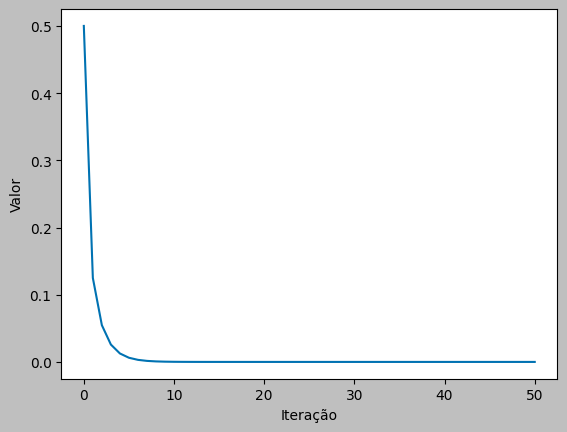

In [ ]:
plotMapaLogistico(
  taxaCrescimento = 0.5,
  tamanhoInicial = 0.5,
  tamanhoMaximo = 50
)

Para valores de taxas de crescimento menores do 1. A população sempre irá tender a zero, pois taxas com esses valores significam que a população sempre estaria diminuindo.

b) Repita o procedimento acima para os seguintes valores de r:
2.5; 3.1; 3.5 e 3.7. Comente sobre cada resultado. Em particular
comente sobre a existência de padrões.

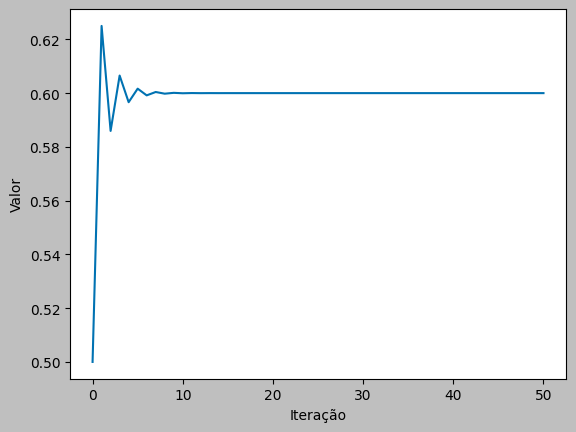

In [ ]:
plotMapaLogistico(
  taxaCrescimento = 2.5,
  tamanhoInicial = 0.5,
  tamanhoMaximo = 50
)

Nesse caso, é possível notar que a população atinge um pico muito alto, mas depois decai bastante. Então, ela fica alternando entre altos e baixos até chegar em um valor constante.

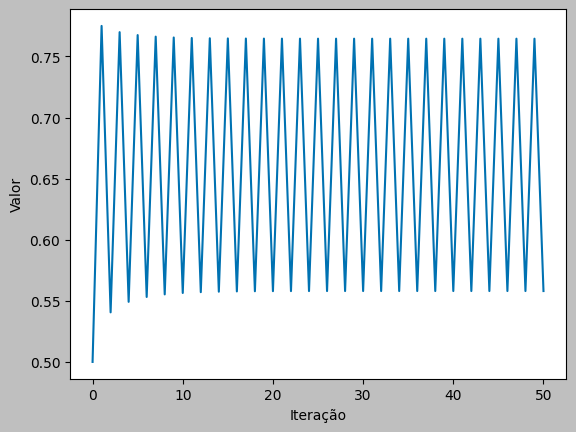

In [ ]:
plotMapaLogistico(
  taxaCrescimento = 3.1,
  tamanhoInicial = 0.5,
  tamanhoMaximo = 50
)

Entre cada iteração sempre há uma troca entre um valor máximo e um valor mínimo. Assim, a formula "entrou em um loop", em que um valor dá o outro como resultado.

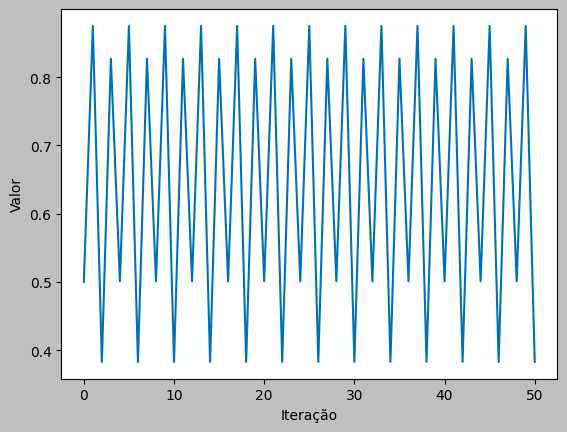

In [ ]:
plotMapaLogistico(
  taxaCrescimento = 3.5,
  tamanhoInicial = 0.5,
  tamanhoMaximo = 50
)

Novamente, a formula "entrou em loop" como no caso anterior, mas desta vez ela está alternando entre 4 valores.

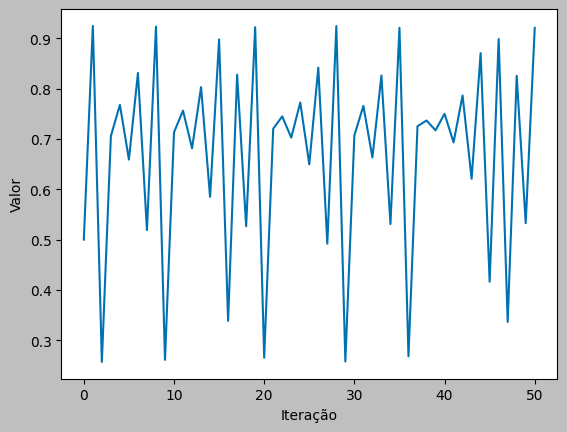

In [ ]:
plotMapaLogistico(
  taxaCrescimento = 3.7,
  tamanhoInicial = 0.5,
  tamanhoMaximo = 50
)

Neste caso, o gráfico não aparenta ter algum tipo de padrão.

c) Refaça os gráficos anteriores considerando três condições
iniciais consideravelmente diferentes, ou seja, trace, em um
mesmo gráfico, as curvas para y0 = 0.25, y0 = 0.5 e y0 = 0.75.
Comente

In [ ]:
def calcularMultiplosMapasLogisticosComDiferentesCondicoesIniciais(taxaCrescimento, condicoesIniciais, tamanhoMaximo):
  dfMapasLogisticos = pd.DataFrame(columns = condicoesIniciais)

  for condicaoInicial in condicoesIniciais:
    dfMapasLogisticos[condicaoInicial] = calcularMapaLogistico(taxaCrescimento, condicaoInicial, tamanhoMaximo)

  dfMapasLogisticos['iteracao'] = dfMapasLogisticos.index
  return dfMapasLogisticos

In [ ]:
def plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(taxaCrescimento, condicoesIniciais, tamanhoMaximo, titulo):
  dfMapasLogisticos = calcularMultiplosMapasLogisticosComDiferentesCondicoesIniciais(taxaCrescimento, condicoesIniciais, tamanhoMaximo)

  for condicaoInicial in condicoesIniciais:
    plt.plot(
        dfMapasLogisticos['iteracao'],
        dfMapasLogisticos[condicaoInicial],
        label = f'Condição Inicial: {condicaoInicial}'
    )

  plt.xlabel('Iteração')
  plt.ylabel('Valor')
  plt.title(titulo)
  plt.legend()
  plt.show()

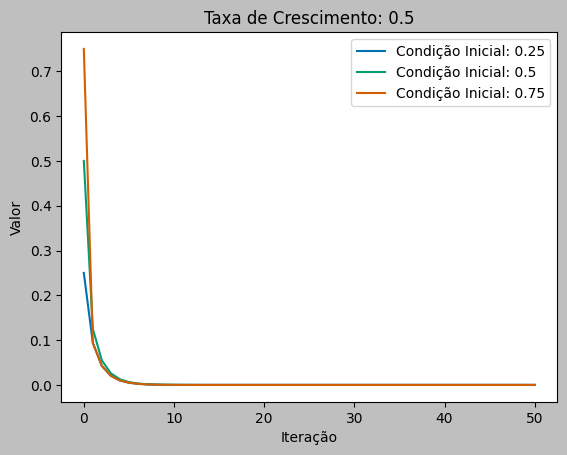

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 0.5,
  condicoesIniciais = [0.25, 0.5, 0.75],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 0.5'
)

É possível notar que para diferentes condições iniciais, todas elas tendem ao valor zero, pois a taxa de crescimento é menor do que 1.

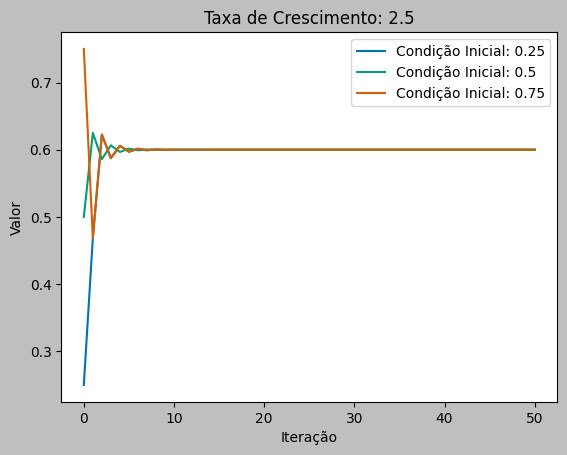

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 2.5,
  condicoesIniciais = [0.25, 0.5, 0.75],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 2.5'
)

Novamente, é possível notar que todas as condições iniciais acabam aproximando de um mesmo valor, mesmo tendo inícios diferentes.

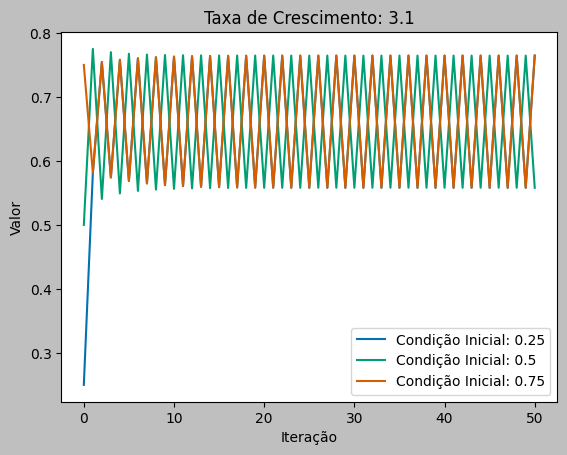

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 3.1,
  condicoesIniciais = [0.25, 0.5, 0.75],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 3.1'
)

Já este gráfico, as condições iniciais parecem serem complementares. Ou seja, quando uma está em um ponto alto a outra está em um ponto baixo. Assim, elas ficam alternando entre dois valores.

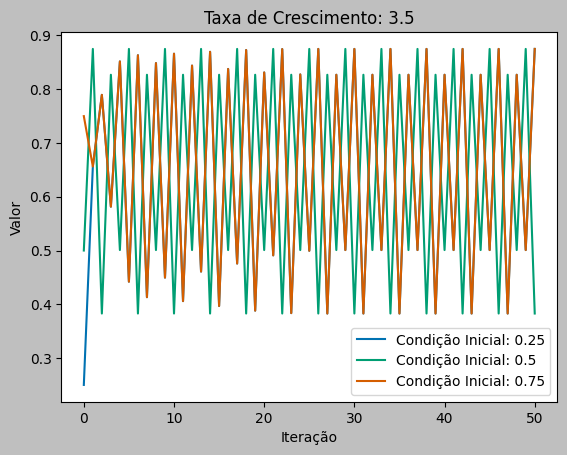

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 3.5,
  condicoesIniciais = [0.25, 0.5, 0.75],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 3.5'
)

Novamente, as condições iniciais parecem serem complementares, mas nesse caso elas estariam um pouco deslocadas para a direita. Ou seja, quando uma atinge o ponto máximo, em mais algumas iterações, a outra irá chegar em seu ponto mínimo.

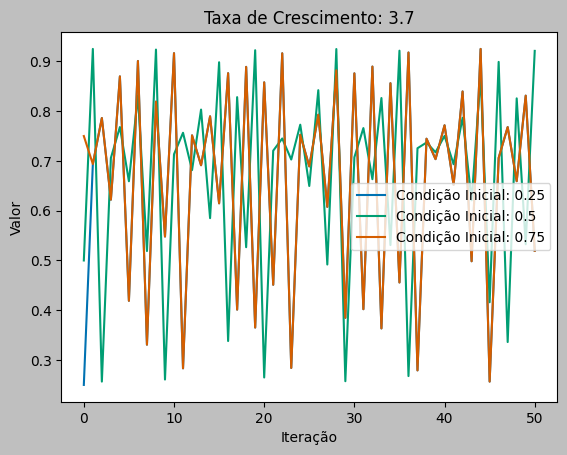

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 3.7,
  condicoesIniciais = [0.25, 0.5, 0.75],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 3.7'
)

Já nesse caso, condições iniciais estão gerando comportamentos bem diferentes. Isso pode ser um indício de "caos".

d) Refaça o item anterior considerando três condições iniciais
ligeiramente diferentes, ou seja, trace as curvas para y0 = 0.5, y0
= 0.501 e y0 = 0.5001. Comente

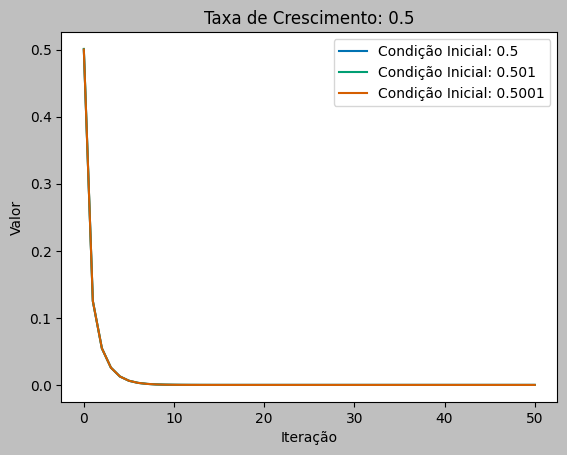

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 0.5,
  condicoesIniciais = [0.5, 0.501, 0.5001],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 0.5'
)

Para este caso, variações pequenas nas condições iniciais fazem com que as linhas se iniciem próximas. Assim como visto anteriormente, todas elas tendem ao zero.

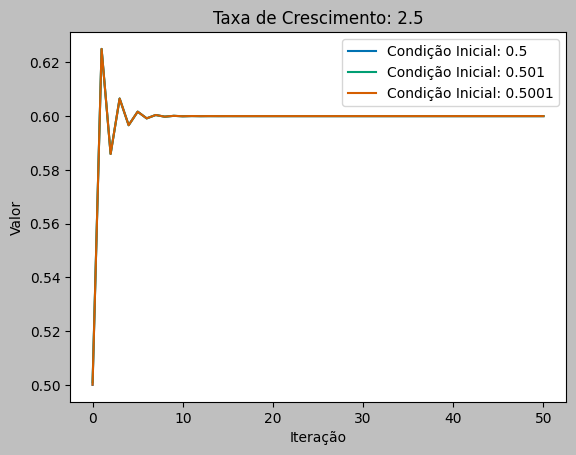

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 2.5,
  condicoesIniciais = [0.5, 0.501, 0.5001],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 2.5'
)

O comportamento anterior permanece para pequenas variações.

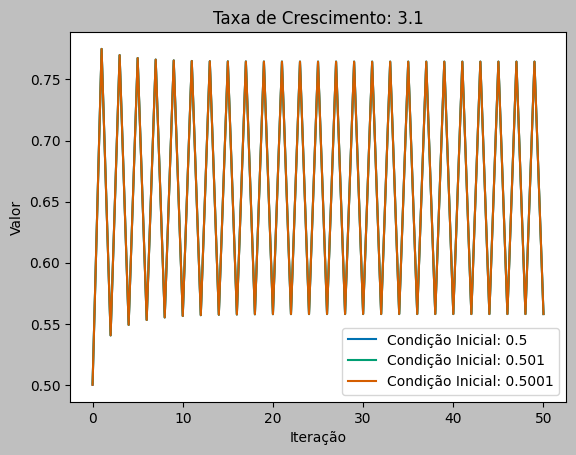

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 3.1,
  condicoesIniciais = [0.5, 0.501, 0.5001],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 3.1'
)

Novamente, tem o mesmo comportamento esperado.

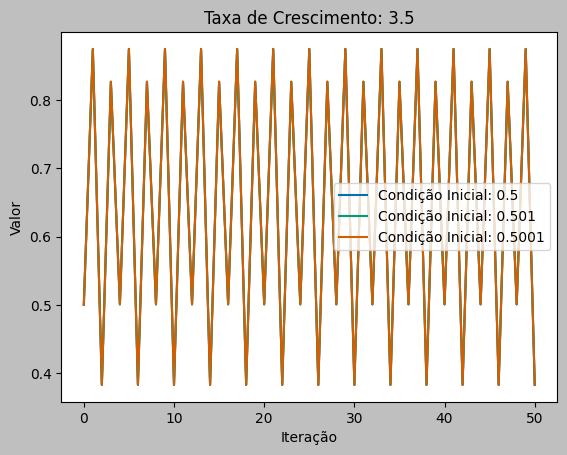

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 3.5,
  condicoesIniciais = [0.5, 0.501, 0.5001],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 3.5'
)

Novamente, tem o mesmo comportamento esperado.

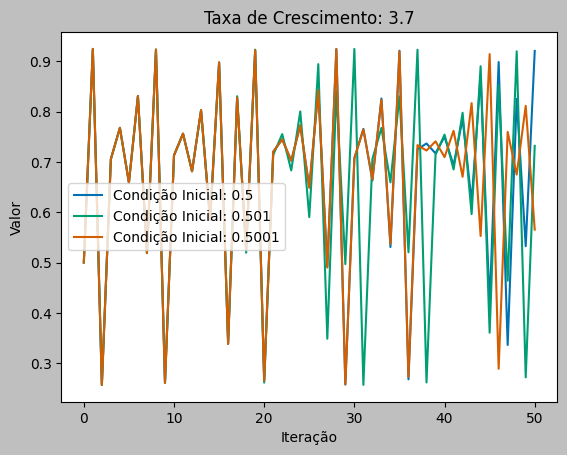

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 3.7,
  condicoesIniciais = [0.5, 0.501, 0.5001],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 3.7'
)

Já neste caso, é possível perceber que até pequenas variações nas condições iniciais já são capazes de gerar resultados completamente diferentes. Isso é um indício de "caos" para este problema.

Ele ocorre devido a aproximações que devem ser feitas, mas acabam levando a resultados diferentes, possibilitando que haja "caos" mesmo em uma fórmula que seria determinística.

# Parte 2
---
Aqui, você deve ter percebido que para determinados valores de r o
comportamento do sistema após um longo tempo não pode ser predito com
segurança. Para explorar melhor esse comportamento, vamos adotar o
seguinte procedimento:

2) a) Considere 10000 valores de r igualmente espaçados entre 10<sup>-5</sup> e 4. Para
cada um desses valores de r, vamos iterar a equação logística 1000 vezes,
i.e., nmax = 1000. Em um gráfico de yn como função de r, vamos plotar para
cada valor de r os 100 últimos passos da evolução. Teremos 100 pontos no
eixo y do gráfico para cada valor de r, que estará no eixo x. A figura gerada
é conhecida como diagrama de bifurcação. Essa figura traz inúmeras
informações importantes. Tire um tempo para pensar nela e analisar o que
encontrou.

In [ ]:
def criarTaxasCrescimentoIgualmenteEspacadas(taxaCrescimentoMinima, taxaCrescimentoMaxima, quantidade):
  return np.linspace(taxaCrescimentoMinima, taxaCrescimentoMaxima, quantidade)

In [ ]:
def criarFractal(taxaCrescimentoMinima, taxaCrescimentoMaxima, valorMinimo = -1, valorMaximo = -1):
  def calcularUltimasIteracoes(taxaCrescimento, condicaoInicial, tamanhoMaximo, quantidadeIteracoesFinais):
    todasIteracoes = calcularMapaLogistico(taxaCrescimento, condicaoInicial, tamanhoMaximo)
    return todasIteracoes[(tamanhoMaximo - quantidadeIteracoesFinais):]

  plt.style.use('grayscale')

  taxasCrescimento = criarTaxasCrescimentoIgualmenteEspacadas(
    taxaCrescimentoMinima = taxaCrescimentoMinima,
    taxaCrescimentoMaxima = taxaCrescimentoMaxima,
    quantidade = 10000
  )

  condicaoInicial = 0.25

  for taxa in taxasCrescimento:
    valores = calcularUltimasIteracoes(
        taxaCrescimento = taxa,
        condicaoInicial = condicaoInicial,
        tamanhoMaximo = 1000,
        quantidadeIteracoesFinais = 100
    )

    plt.plot(
        [taxa for _ in range(101)],
        valores,
        marker = 'o',
        markersize = 0.5,
        markerfacecolor = 'black',
        linestyle = 'None'
    )

  plt.title('Fractal')
  plt.xlabel('')
  plt.ylabel('')

  if valorMinimo != -1 and valorMaximo != -1:
    plt.ylim(valorMinimo, valorMaximo)

  plt.show()

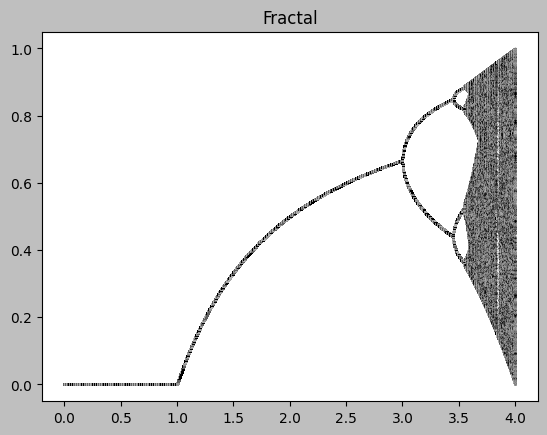

In [ ]:
criarFractal(
    taxaCrescimentoMinima = 0.00001,
    taxaCrescimentoMaxima = 4
)

Como dito inicialmente, é possível notar que todos os valores de Taxas de Crescimento entre 0 e 1 tem como resultado 0.

A partir de 1, a medida que a taxa de crescimento aumenta, os valores dela também aumentam gradualmente, como se fosse parte de uma parábola de uma função de 2° grau.

Para os valores de Taxas de Crescimento entre 3.0 e 3.5 (aproximadamente). É possível notar que ela se divide e fica alternando entre dois possiveis valores.

Já entre 3.5 e 3.7 é quando as Taxas de Crescimento passam a alternar entre 4 possíveis valores.

A partir de 3.7 é quando chegamos na situação de "caos", em que temos diversos valores possíveis e a mínima variação na condição inicial irá resultar em valores diferentes.

É uma boa representação do que foi visto nos gráficos anteriores da questão 1) d).

b) Para explorar melhor uma das interessantes propriedades desse diagrama,
refaça o procedimento anterior para valores de r entre 3.7 e 3.9 e para
valores de r entre 3.840 e 3.856. No último caso, para melhorar a
visualização, restrinja os valores do eixo y para o intervalo entre 0,44 e 0,56.
Comente seus resultados.

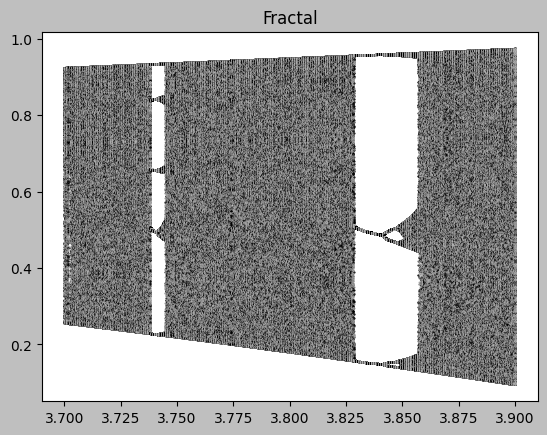

In [ ]:
criarFractal(
    taxaCrescimentoMinima = 3.7,
    taxaCrescimentoMaxima = 3.9
)

É possível notar que ao dar um zoom nos valores possíveis de serem assumidos, o padrão descrito anteriormente volta a acontecer.

Então, entre 3.825 e 3.854 é possível encontrar Taxas de Crescimento que fiquem alternando entre uma certa quantidade de valores, que irão aumentando até chegar em situação de caos novamente.

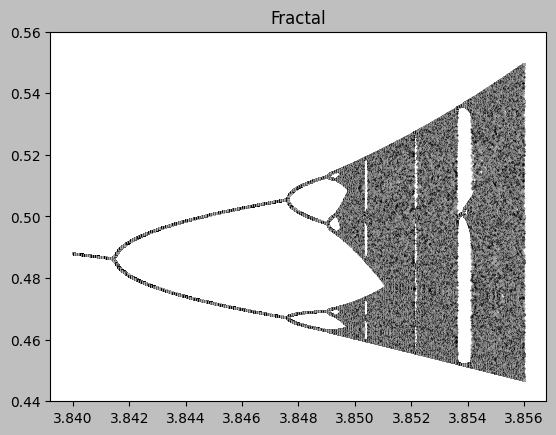

In [ ]:
criarFractal(
    taxaCrescimentoMinima = 3.840,
    taxaCrescimentoMaxima = 3.856,
    valorMinimo = 0.44,
    valorMaximo = 0.56
)

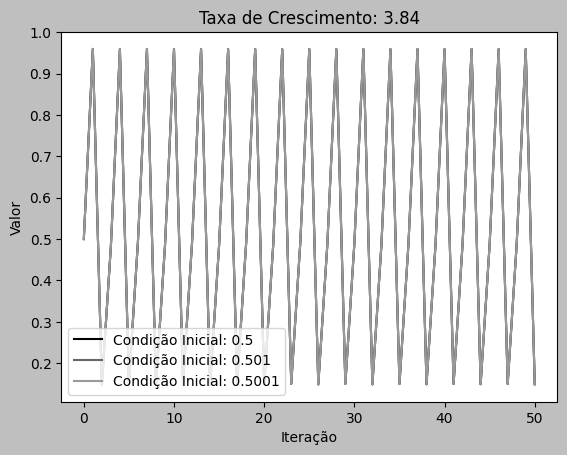

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 3.84,
  condicoesIniciais = [0.5, 0.501, 0.5001],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 3.84'
)

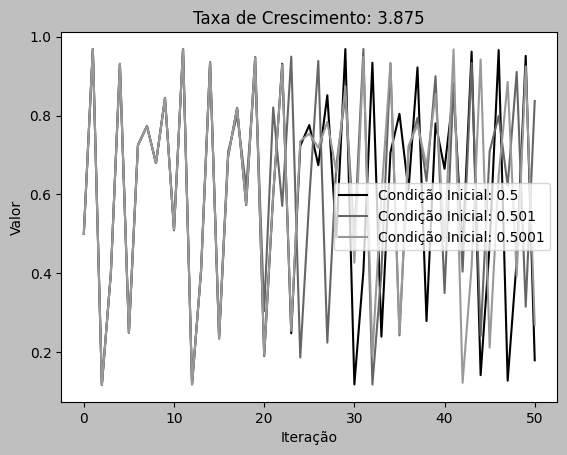

In [ ]:
plotMultiplosMapasLogisticosComDiferentesCondicoesIniciais(
  taxaCrescimento = 3.875,
  condicoesIniciais = [0.5, 0.501, 0.5001],
  tamanhoMaximo = 50,
  titulo = 'Taxa de Crescimento: 3.875'
)